## 2조

### Q1. 다차원 배열의 계산(6점)
  - 발표자료 13p의 내용을 참고하여 활성화 함수가 ReLU이고, $h_1 = g(-0.6x_1 + 0.4x_2 - 40)$, $h_2 = g(0.7x_1 - 0.3x_2 - 30)$, $o = g(120h_1 + 80h_2 - 90)$ 일 때 $h_1, h_2, o$를 구하는 코드를 구현하세요.

In [2]:
import numpy as np

# 변수 설정
x1 = np.arange(-100, 100, 1)
x2 = np.arange(-100, 100, 1)
x1, x2 = np.meshgrid(x1, x2)

def relu(x):
    return np.maximum(0, x)
h1 = relu(-0.6 * x1 + 0.4 * x2 - 40)
h2 = relu(0.7 * x1 - 0.3 * x2 - 30)
o = relu(120 * h1 + 80 * h2 - 90)

# 결과 출력
print("h1:", h1)
print("h2:", h2)
print("o:", o)

h1: [[ 0.   0.   0.  ...  0.   0.   0. ]
 [ 0.   0.   0.  ...  0.   0.   0. ]
 [ 0.   0.   0.  ...  0.   0.   0. ]
 ...
 [58.8 58.2 57.6 ...  0.   0.   0. ]
 [59.2 58.6 58.  ...  0.   0.   0. ]
 [59.6 59.  58.4 ...  0.   0.   0. ]]
h2: [[ 0.   0.   0.  ... 67.9 68.6 69.3]
 [ 0.   0.   0.  ... 67.6 68.3 69. ]
 [ 0.   0.   0.  ... 67.3 68.  68.7]
 ...
 [ 0.   0.   0.  ...  8.8  9.5 10.2]
 [ 0.   0.   0.  ...  8.5  9.2  9.9]
 [ 0.   0.   0.  ...  8.2  8.9  9.6]]
o: [[   0.    0.    0. ... 5342. 5398. 5454.]
 [   0.    0.    0. ... 5318. 5374. 5430.]
 [   0.    0.    0. ... 5294. 5350. 5406.]
 ...
 [6966. 6894. 6822. ...  614.  670.  726.]
 [7014. 6942. 6870. ...  590.  646.  702.]
 [7062. 6990. 6918. ...  566.  622.  678.]]


### Q2. MNIST 데이터셋을 활용한 신경망 모델 학습 (20점)

2-1) 2점
- torchvision 라이브러리를 사용하여 MNIST 데이터셋을 불러오세요.

In [3]:
from torchvision.datasets import MNIST
import torchvision.transforms as transforms

# MNIST 데이터셋 다운로드 및 로드
train_data = MNIST(root='./datasets/', train=True, transform=transforms.ToTensor(), download=True)
test_data = MNIST(root='./datasets/', train=False, transform=transforms.ToTensor(), download=True)

2-2) 2점
- torch.utils.data.DataLoader를 사용하여 데이터 로더를 생성하세요. 배치 크기는 128로 설정하세요.

In [4]:
from torch.utils.data import DataLoader

# 데이터 로더 생성
train_loader = DataLoader(dataset=train_data, batch_size=128, shuffle=True, num_workers=4)
test_loader = DataLoader(dataset=test_data, batch_size=128, shuffle=False, num_workers=4)

2-3) 5점
- MNIST 데이터를 위한 간단한 신경망 모델을 구현하세요.

In [5]:
import torch.nn as nn
import torch.nn.functional as F

# 신경망 모델 정의
class MNISTModel(nn.Module):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))  # 첫 번째 완전 연결층에 ReLU 활성화 함수 적용
        x = F.relu(self.fc2(x))  # 두 번째 완전 연결층에 ReLU 활성화 함수 적용
        x = F.log_softmax(self.fc3(x), dim=1)  # 출력층에 소프트맥스 활성화 함수 적용
        return x

model = MNISTModel()

2-4) 3점
- 손실 함수와 최적손실 함수와 최적화 기법을 설정하세요.

In [6]:
import torch.optim as optim

# 손실 함수와 최적화 기법 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

2-5) 4점
- 에포크 당 손실을 출력하는 모델 학습 루프를 구성하세요.

In [7]:
import torch

# 모델 학습 루프
num_epochs = 5

# CUDA가 가능한지 확인 후, 가능한 경우 GPU 사용
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        # 입력 데이터와 레이블을 선택한 장치로 이동
        images, labels = images.to(device), labels.to(device)

        # 기울기 초기화
        optimizer.zero_grad()

        # 순전파
        outputs = model(images)
        loss = criterion(outputs, labels)

        # 역전파 및 최적화
        loss.backward()
        optimizer.step()

        # 손실 누적
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}")

RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\torch\utils\data\_utils\worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\torch\utils\data\_utils\fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
            ~~~~~~~~~~~~^^^^^
  File "c:\Python312\Lib\site-packages\torchvision\datasets\mnist.py", line 143, in __getitem__
    img = Image.fromarray(img.numpy(), mode="L")
                          ^^^^^^^^^^^
RuntimeError: Numpy is not available


2-6) 4점
- 테스트 데이터셋을 사용하여 모델의 성능을 평가하세요. 정확도를 출력하세요.

In [8]:
# 모델 평가
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100*correct/total
print(f'Test Accuracy: {accuracy:.2f}%')

RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\torch\utils\data\_utils\worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\torch\utils\data\_utils\fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
            ~~~~~~~~~~~~^^^^^
  File "c:\Python312\Lib\site-packages\torchvision\datasets\mnist.py", line 143, in __getitem__
    img = Image.fromarray(img.numpy(), mode="L")
                          ^^^^^^^^^^^
RuntimeError: Numpy is not available


### Q3. CIFAR-10 데이터셋을 활용한 신경망 모델 학습 (24점)

3-1) 2점
- torchvision 라이브러리를 사용하여 CIFAR-10 데이터셋을 불러오세요.

In [9]:
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms

# CIFAR-10 데이터셋 다운로드 및 로드
train_data = CIFAR10(root='./datasets/', train=True, transform=transforms.ToTensor(), download=True)
test_data = CIFAR10(root='./datasets/', train=False, transform=transforms.ToTensor(), download=True)

100.0%


Extracting ./datasets/cifar-10-python.tar.gz to ./datasets/
Files already downloaded and verified


3-2) 2점
- torch.utils.data.DataLoader를 사용하여 데이터 로더를 생성하세요. 배치 크기는 64로 설정하세요.

In [10]:
from torch.utils.data import DataLoader

# 데이터 로더 생성
train_loader = DataLoader(dataset=train_data, batch_size=64, shuffle=True, num_workers=4)
test_loader = DataLoader(dataset=test_data, batch_size=64, shuffle=False, num_workers=4)

3-3) 5점
- CNN 모델 코드의 빈칸을 채워 실행하세요.

In [11]:
import torch.nn as nn
import torch.nn.functional as F

# CNN 모델 정의
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        # 첫 번째 합성곱 층: 입력 채널 3, 출력 채널 32, 커널 크기 3x3
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        # 두 번째 합성곱 층: 입력 채널 32, 출력 채널 64, 커널 크기 3x3
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        # 첫 번째 완전 연결층: 입력 노드 수 64*6*6, 출력 노드 수 128
        self.fc1 = nn.Linear(64 * 6 * 6, 128)
        # 두 번째 완전 연결층: 입력 노드 수 128, 출력 노드 수 10 (클래스 수)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # 첫 번째 합성곱 층 + ReLU + 최대 풀링
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        # 두 번째 합성곱 층 + ReLU + 최대 풀링
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        # 텐서를 1차원으로 펼침
        x = x.view(-1, 64*6*6)
        # 첫 번째 완전 연결층 + ReLU
        x = F.relu(self.fc1(x))
        # 두 번째 완전 연결층 (출력층)
        x = self.fc2(x)
        return x

# 모델 초기화
cnn_model = CNNModel()

3-4) 5점
- CNN 모델 학습 및 평가 코드의 빈칸을 채워 실행하세요.

In [13]:
import torch.optim as optim

# 손실 함수와 최적화 기법 설정
criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

# CUDA가 가능한지 확인 후, 가능한 경우 GPU 사용
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
cnn_model.to(device)

# 모델 학습
num_epochs = 5
for epoch in range(num_epochs):
    cnn_model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = cnn_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

# 모델 평가
cnn_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = cnn_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100*correct/total
print(f'Test Accuracy: {accuracy:.2f}%')

RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\torch\utils\data\_utils\worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\torch\utils\data\_utils\fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
            ~~~~~~~~~~~~^^^^^
  File "c:\Python312\Lib\site-packages\torchvision\datasets\cifar.py", line 119, in __getitem__
    img = self.transform(img)
          ^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\torchvision\transforms\transforms.py", line 137, in __call__
    return F.to_tensor(pic)
           ^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\torchvision\transforms\functional.py", line 168, in to_tensor
    img = torch.from_numpy(np.array(pic, mode_to_nptype.get(pic.mode, np.uint8), copy=True))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: Numpy is not available


3-5) 5점
- RNN 모델 코드의 빈칸을 채워 실행하세요.

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class RNNModel(nn.Module):
    def __init__(self):
        super(RNNModel, self).__init__()
        # RNN 층: 입력 차원 32*3 (이미지의 행 크기), 은닉 상태 차원 128
        self.rnn = nn.RNN(input_size=32*3, hidden_size=128, batch_first=True)
        # 완전 연결층: 입력 노드 수 128, 출력 노드 수 10 (클래스 수)
        self.fc = nn.Linear(128, 10)

    def forward(self, x):
        # 이미지 데이터를 (batch_size, channels, height, width)에서 (batch_size, height, width, channels)로 변환
        x = x.permute(0, 2, 3, 1)
        # 이미지를 1D 시퀀스로 변환: (batch_size, height, width, channels) -> (batch_size, height, width*channels)
        x = x.reshape(x.size(0), 32, -1)
        # RNN 연산
        out, _ = self.rnn(x)
        # 마지막 시간 단계의 출력을 완전 연결층에 통과
        out = self.fc(out[:, -1, :])
        return out

# 모델 초기화
rnn_model = RNNModel()

3-6) 5점
- RNN 모델 학습 및 평가 코드의 빈칸을 채워 실행하세요.

In [15]:
import torch.optim as optim

# 손실 함수와 최적화 기법 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(rnn_model.parameters(), lr=0.001)

# CUDA가 가능한지 확인 후, 가능한 경우 GPU 사용
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
rnn_model.to(device)

# 모델 학습
num_epochs = 5
for epoch in range(num_epochs):
    rnn_model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = rnn_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

# 모델 평가
rnn_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = rnn_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100*correct/total
print(f'Test Accuracy: {accuracy:.2f}%')

RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\torch\utils\data\_utils\worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\torch\utils\data\_utils\fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
            ~~~~~~~~~~~~^^^^^
  File "c:\Python312\Lib\site-packages\torchvision\datasets\cifar.py", line 119, in __getitem__
    img = self.transform(img)
          ^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\torchvision\transforms\transforms.py", line 137, in __call__
    return F.to_tensor(pic)
           ^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\torchvision\transforms\functional.py", line 168, in to_tensor
    img = torch.from_numpy(np.array(pic, mode_to_nptype.get(pic.mode, np.uint8), copy=True))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: Numpy is not available


## 3조. 손실함수, 수치미분(편미분), 경사하강법 - 총 50점

### 1. 손실함수와 수치미분(편미분)


Diabetes 데이터셋을 로드하고, 데이터셋의 첫 번째 특징('age')을 사용하여 목표 변수('target')를 예측하는 단순 선형 회귀 모델을 학습하세요.

In [16]:
#문제가 아닙니다.
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

# 1. 데이터셋 로드
diabetes = load_diabetes()
X = diabetes.data[:, np.newaxis, 0]  # 'age' 특성 선택
y = diabetes.target

# 2. 단순 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

1.1) 평균 제곱 오차(MSE)를 계산하는 코드를 완성하시오.(5점)

In [19]:
# 3. 평균 제곱 오차(MSE) 계산
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

MSE: 5720.55
MAE: 64.55


1.2) 평균 절대 오차(MAE)와 평균 제곱 오차(MSE)의 정의와 각 손실함수의 특징을 설명하시오.(5점)

평균 제곱 오차(MSE) : 예측값과 실제값 간의 제곱 차이의 평균이다. 큰 오차에 더 민감하여 이상치에 영향을 많이 받는다.

평균 절대 오차(MAE) : 예측값과 실제값 간의 절대값 차이의 평균이다. 직관적으로 이해하기 쉽다.

특징 :

1.3) 위에서 학습한 모델의 예측값에 대해 특정 샘플의 입력값에 대한 손실 함수의 편미분을 계산하는 코드를 완성하시오.(5점)

In [17]:
# 함수 정의
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# 수치미분 함수 정의
def numerical_derivative(f, x, h=0.01):
    return (f(x + h) - f(x - h)) / (2 * h)

# 특정 입력값 x_0 설정
x_0 = X[0][0]

# MSE 손실 함수에 대한 편미분 계산
def mse_loss_at_x0(x):
    X_new = X.copy()
    X_new[0, 0] = x
    y_pred_new = model.predict(X_new)
    return mse_loss(y, y_pred_new)

# 중심차분법을 사용한 편미분 계산
derivative_at_x0 = numerical_derivative(mse_loss_at_x0, x_0)
print(f"Numerical derivative of MSE at x_0: {derivative_at_x0:.5f}")

Numerical derivative of MSE at x_0: 17.50158


1.4) 수치미분을 사용하여 모델 파라미터를 업데이트하시오. (5점)

In [20]:
# 모델 초기화
class SimpleLinearRegression:
    def __init__(self):
        self.w = 0
        self.b = 0

    def predict(self, X):
        return self.w * X + self.b

    def update_params(self, w_grad, b_grad, learning_rate=0.01):
        self.w -= learning_rate * w_grad
        self.b -= learning_rate * b_grad

# 모델 인스턴스 생성
simple_model = SimpleLinearRegression()

# 손실 함수에 대한 파라미터의 편미분 계산 함수 정의
def mse_loss_wrt_params(w, b):
    simple_model.w = w
    simple_model.b = b
    y_pred = simple_model.predict(X)
    return mse_loss(y, y_pred)

# 수치미분을 사용하여 그래디언트 계산
w_grad = numerical_derivative(lambda w: mse_loss_wrt_params(w, simple_model.b), simple_model.w)
b_grad = numerical_derivative(lambda b: mse_loss_wrt_params(simple_model.w, b), simple_model.b)

# 파라미터 업데이트
simple_model.update_params(w_grad, b_grad)

# 업데이트된 파라미터 출력
print(f"Updated w: {simple_model.w:.5f}")
print(f"Updated b: {simple_model.b:.5f}")


Updated w: -0.01000
Updated b: 3.03267


1.5) 위의 코드를 확장하여 여러 번의 파라미터 업데이트를 수행하는 코드를 완성하시오.(5점)

In [21]:
# 여러 번의 파라미터 업데이트
num_iterations = 100
learning_rate = 0.01

for i in range(num_iterations):
    w_grad = numerical_derivative(lambda w: mse_loss_wrt_params(w, simple_model.b), simple_model.w)
    b_grad = numerical_derivative(lambda b: mse_loss_wrt_params(simple_model.w, b), simple_model.b)
    simple_model.update_params(w_grad, b_grad, learning_rate=learning_rate)
    if i % 10 == 0:
        current_loss = mse_loss(y, simple_model.predict(X))
        print(f"Iteration {i}: Loss = {current_loss:.5f}")

# 최종 파라미터와 손실 함수 값 출력
final_loss = mse_loss(y, simple_model.predict(X))
print(f"Final Loss: {final_loss:.5f}")
print(f"Final w: {simple_model.w:.5f}")
print(f"Final b: {simple_model.b:.5f}")

Iteration 0: Loss = 27283.51056
Iteration 10: Loss = 20207.58513
Iteration 20: Loss = 15479.65930
Iteration 30: Loss = 12320.00508
Iteration 40: Loss = 10207.93664
Iteration 50: Loss = 8795.73107
Iteration 60: Loss = 7851.15686
Iteration 70: Loss = 7219.10172
Iteration 80: Loss = 6795.95206
Iteration 90: Loss = 6512.48610
Final Loss: 6338.22516
Final w: -1.00772
Final b: 131.92611


### 2. 기울기 (경사하강법)

2-1) 경사 하강법이란 무엇인가요? 경사 하강법이 신경망 학습에 어떻게 사용되는지 간단히 설명하세요. (4점)

답: 함수의 최소값을 찾기 위해 사용되는 방법으로 역전파 알고리즘을 이용해 기울기 계산을 하고 손실함수로 영향을 확인한다. 이후 기울기에 따라 신경망의 가중치와 편향을 업데이트한다. 이를 반복하며 모델의 성능을 개선한다.

2-2) 빈칸을 채워 평균 제곱 오차(MSE)를 비용 함수로 사용하는 배치 경사 하강법을 파이썬 코드로 구현하세요. (5점)

In [22]:
# 코드를 그대로 실행하세요

import numpy as np

# 데이터셋 생성
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [23]:
# 배치 경사 하강법 함수 정의
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions - y))
    return cost

def batch_gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        theta = theta - (learning_rate / m)*(X.T.dot((predictions - y)))
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

# 데이터 준비 (바이어스 항 추가)
X_b = np.c_[np.ones((len(X), 1)), X]
theta = np.random.randn(2, 1)
learning_rate = 0.01
iterations = 1000

# 배치 경사 하강법 실행
theta, cost_history = batch_gradient_descent(X_b, y, theta, learning_rate, iterations)

print(f'최종 파라미터: theta0 = {theta[0][0]}, theta1 = {theta[1][0]}')

최종 파라미터: theta0 = 4.14146131326896, theta1 = 3.040065929195248


2-3) load_diabetes 데이터셋을 사용하여 확률적 경사 하강법을 구현하세요. 각 에포크(epoch)마다 비용 함수 값을 계산하고 이를 시각화하세요. (5점)

In [24]:
# 코드를 그대로 실행하세요

from sklearn.datasets import load_diabetes
import numpy as np
import matplotlib.pyplot as plt

# 데이터셋 불러오기
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target.reshape(-1, 1)

# 데이터 표준화
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# 데이터 준비 (바이어스 항 추가)
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# 초기화
theta = np.random.randn(X_b.shape[1], 1)
learning_rate = 0.01
iterations = 1000

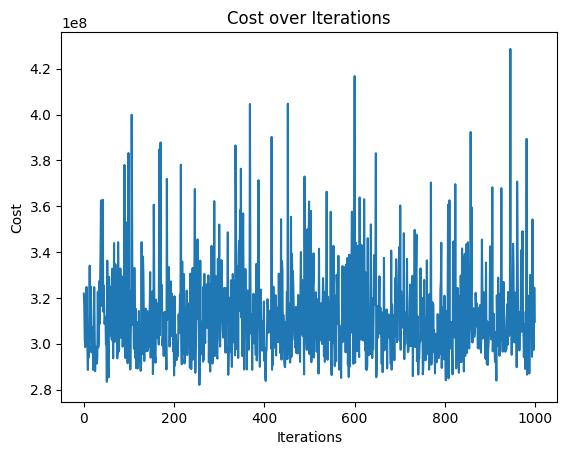

In [25]:
# 비용 함수 정의
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions- y))
    return cost

# 확률적 경사 하강법 함수 정의
def stochastic_gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        for j in range(m):
            rand_index = np.random.randint(m)
            X_i = X[rand_index:rand_index+1]
            y_i = y[rand_index:rand_index+1]
            gradients = 2 * X_i.T.dot(X_i.dot(theta) - y_i)
            theta = theta - learning_rate * gradients
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

# 확률적 경사 하강법 실행
theta, cost_history = stochastic_gradient_descent(X_b, y, theta, learning_rate, iterations)

# 비용 함수 시각화
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over Iterations')
plt.show()

2-4) load_wine 데이터셋의 첫 번째 두 특징을 사용하여 미니 배치 경사 하강법을 구현하세요. 각 에포크(epoch)마다 비용 함수 값을 계산하고 이를 시각화하세요. (6점)

In [26]:
# 여기부터 문제입니다

from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt


wine = load_wine()
X = wine.data[:, :2]
y = (wine.target == 0).astype(int).reshape(-1, 1)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10644\313753645.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost_history[i] = compute_cost(X, y, theta)


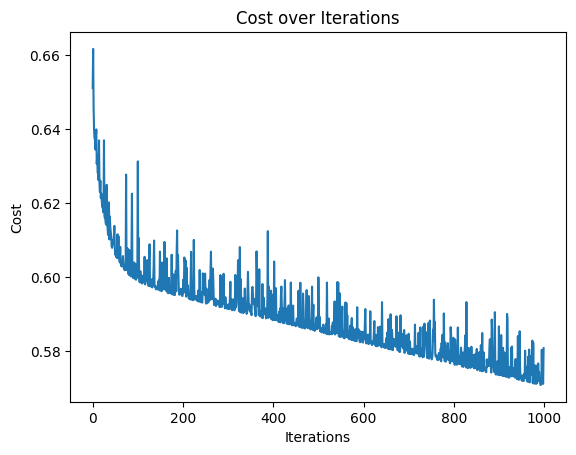

In [27]:
# 시그모이드 함수
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 비용 함수 정의
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    epsilon = 1e-5
    cost = -(1/m) * (y.T.dot(np.log(h + epsilon)) + (1 - y).T.dot(np.log(1 - h + epsilon)))
    return cost

# 미니 배치 경사 하강법 함수 정의
def mini_batch_gradient_descent(X, y, theta, learning_rate, iterations, batch_size):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for j in range(0, m, batch_size):
            X_i = X_shuffled[j:j+batch_size]
            y_i = y_shuffled[j:j+batch_size]
            gradients = (1/batch_size) * X_i.T.dot(sigmoid(X_i.dot(theta)) - y_i)
            theta -= learning_rate * gradients

        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

# 데이터 준비 (바이어스 항 추가)
X_b = np.c_[np.ones((len(X), 1)), X]

# 초기화
theta = np.zeros((X_b.shape[1], 1))
learning_rate = 0.01
iterations = 1000
batch_size = 20

# 미니 배치 경사 하강법 실행
theta, cost_history = mini_batch_gradient_descent(X_b, y, theta, learning_rate, iterations, batch_size)

# 비용 함수 시각화
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over Iterations')
plt.show()

2-5) 4번 문제에서 미니 배치 경사 하강법으로 학습한 모델을 사용하여 load_wine 데이터셋의 첫 번째 두 특징에 대한 예측을 수행하고, 모델의 정확도를 계산하세요. (5점)

In [28]:
from sklearn.metrics import accuracy_score

# 예측 함수 정의
def predict(X, theta):
    return sigmoid(X.dot(theta)) >= 0.5

# 예측 및 정확도 계산
y_pred = predict(X_b, theta)
accuracy = accuracy_score(y, y_pred)
print(f'모델의 정확도: {accuracy * 100:.2f}%')

모델의 정확도: 71.91%
